## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_data_results_df= pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice.
mice = mouse_data_results_df["Mouse ID"].value_counts()
number_of_mice = len(mice)
# Print test
number_of_mice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#loc will grab rows in the dataframe where my index label is Mouse ID.
#Duplicated.subset will return values for rows that are duplicated while shuffling through Mouse ID and Timpoint.
#.Unique() will return distinct values.
duplicate_mice = mouse_data_results_df.loc[mouse_data_results_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
# Print test
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_duplicates = mouse_data_results_df.duplicated()
duplicates = mouse_data_results_df[all_data_duplicates]
# Print test
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_results_df[mouse_data_results_df['Mouse ID'].isin(duplicate_mice)==False]
# Print test
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice = clean_df["Mouse ID"].value_counts()
number_of_new_mice = len(new_mice)
# Print test
number_of_new_mice


248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# First, grab mean, median, variance, SD and SEM of the Column Tumor Volume in the dataset by grouping by on the Drug Regimen column. 

dataset_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
# Print test
dataset_mean

dataset_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
# Print test
dataset_median

dataset_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
# Print test
dataset_variance

dataset_sd = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
# Print test
dataset_sd

dataset_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# Print test
dataset_sem

# Now, dumping data in a simgle summary dataframe. 
dataset_summary_df = pd.DataFrame({"Mean": dataset_mean, "Median": dataset_median, "Variance": dataset_variance, "Standard Deviation": dataset_sd,
                                 "Standard Error of the Mean": dataset_sem})

# Print test
dataset_summary_df


,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
other_summary = clean_df.groupby('Drug Regimen')
#Print test
other_summary
# Using the aggregation method, produce the same summary statistics in a single line
other_dataset_summary = other_summary.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
# Print test
other_dataset_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Weight (g), dtype: int64

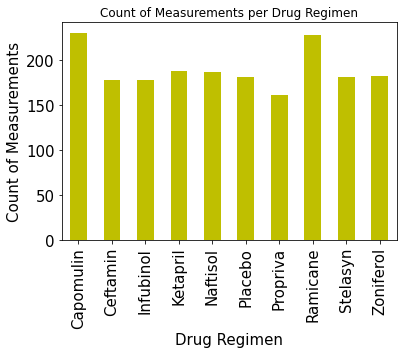

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# x-axis will hold the name of distinct names of drug regimen, Y-axis will hold the measurements values
# First grab total count (not sure if I need to grab from the original merge dataset or the clean dataset)

measurements_total = mouse_data_results_df.groupby(["Drug Regimen"]).count()["Weight (g)"] 
measurements_total

# Plotting

plotting_pandas = measurements_total.plot.bar(color='y', fontsize = 15)
# Print test
# measurements_total
#Plot beautification
plt.xlabel("Drug Regimen", fontsize = 15)
plt.ylabel("Count of Measurements", fontsize = 15)
plt.title("Count of Measurements per Drug Regimen")
# Print test
measurements_total

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
